# 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create path
path = r'/Users/dana/Documents/Pew Research Reading Project/'

# import data
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_all3years.pkl'))

# 2. Make some charts

In [3]:
# make a subset of only people who read
dfreaders = df[df['number_of_books_read']>0]

In [4]:
# make a subset of non readers
nonreaders = df[df['number_of_books_read']==0]

In [5]:
# make a subset that has equal numbers of each generation
sample_size = 450
sample = df.groupby('generation').apply(lambda x: x.sample(sample_size))

In [6]:
# Do older generations read mostly printed books rather than e-books and audiobooks?

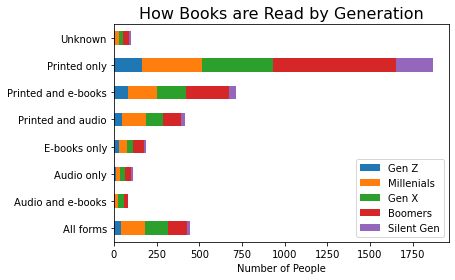

In [7]:
dfreaders.groupby(['reading_type', 'generation']).size().unstack().plot(
    y=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],kind='barh', stacked=True)
plt.title('How Books are Read by Generation',size=16)
plt.xlabel('Number of People')
plt.ylabel('')
plt.legend(title='')

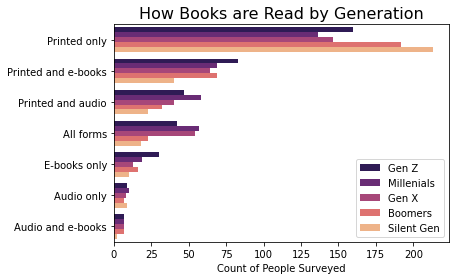

In [8]:
# make a better version of above chart
sns.countplot(data=sample, y='reading_type',palette='magma',hue='generation',
              hue_order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],
             order=['Printed only','Printed and e-books','Printed and audio','All forms','E-books only',
                    'Audio only','Audio and e-books'])
plt.title('How Books are Read by Generation',size=16)
plt.xlabel('Count of People Surveyed')
plt.ylabel('')
plt.legend(title='')

In [9]:
# younger generations are more likely to read forms other than printed but printed only is still the most popular
# among all generations. Millenials are most likely to read multiple forms of books.

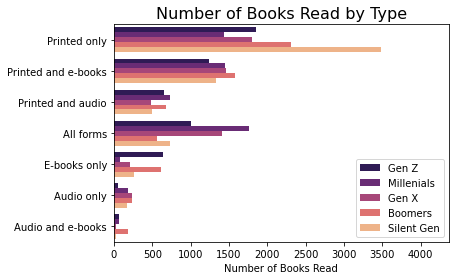

In [10]:
sns.barplot(data=sample,x='number_of_books_read', y='reading_type',palette='magma',hue='generation',
              hue_order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],
             order=['Printed only','Printed and e-books','Printed and audio','All forms','E-books only',
                    'Audio only','Audio and e-books'],errwidth=0, estimator=sum)
plt.title('Number of Books Read by Type',size=16)
plt.xlabel('Number of Books Read')
plt.ylabel('')
plt.legend(title='')

Text(0, 0.5, '')

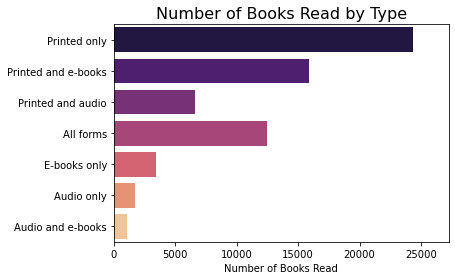

In [11]:
# make similar plot but without generations
sns.barplot(data=df,x='number_of_books_read', y='reading_type',palette='magma',
             order=['Printed only','Printed and e-books','Printed and audio','All forms','E-books only',
                    'Audio only','Audio and e-books'],errwidth=0, estimator=sum)
plt.title('Number of Books Read by Type',size=16)
plt.xlabel('Number of Books Read')
plt.ylabel('')

Text(0.5, 1.0, 'Average Number of Books Read by Generation')

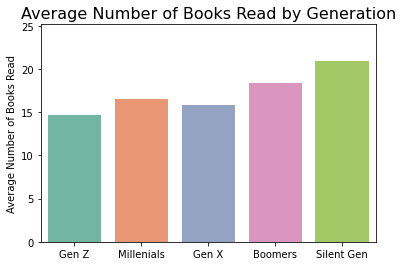

In [12]:
# does any generation read more than the others?
sns.barplot(data=dfreaders, x='generation', y='number_of_books_read',palette='Set2',errwidth=0,
           order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'])
plt.xlabel('')
plt.ylabel('Average Number of Books Read')
plt.title('Average Number of Books Read by Generation',size=16)

In [13]:
# older generations read slightly more on average than younger, but not by much

In [14]:
# from which generations do nonreaders come from?

In [15]:
nonreadersample = sample[sample['number_of_books_read']==0]

Text(0.5, 1.0, "Who Doesn't Read?")

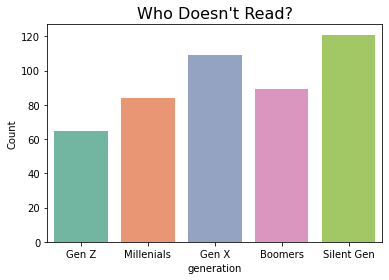

In [16]:
sns.countplot(data=nonreadersample, x='generation',palette='Set2',
           order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'])
plt.ylabel('Count')
plt.title("Who Doesn't Read?",size=16)

In [17]:
# when adjusted for differing generation sizes in the df, older gens are most likely to be non-readers

In [18]:
# Do higher educated people read more?

Text(0.5, 1.0, 'Books Read by Education Level')

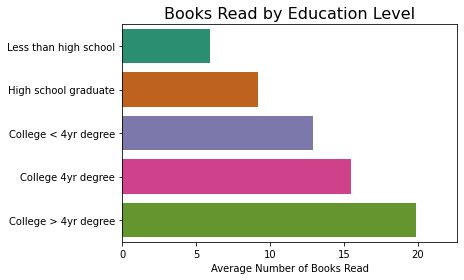

In [19]:
sns.barplot(data=df, y='education_group', x='number_of_books_read',palette='Dark2',errwidth=0,
           order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'])
plt.ylabel('')
plt.xlabel('Average Number of Books Read')
plt.title('Books Read by Education Level',size=16)

Text(0.5, 1.0, 'Total Books Read by Education Level')

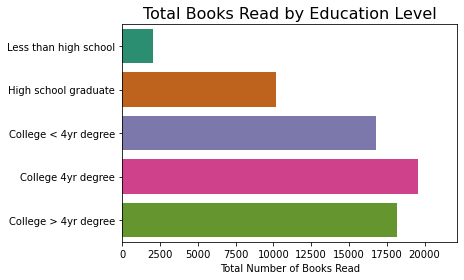

In [20]:
sns.barplot(data=df, y='education_group', x='number_of_books_read',palette='Dark2',errwidth=0,
           order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'],estimator=sum)
plt.ylabel('')
plt.xlabel('Total Number of Books Read')
plt.title('Total Books Read by Education Level',size=16)

In [21]:
# it would seem so. What about in a boxplot?

<AxesSubplot:xlabel='number_of_books_read', ylabel='education_group'>

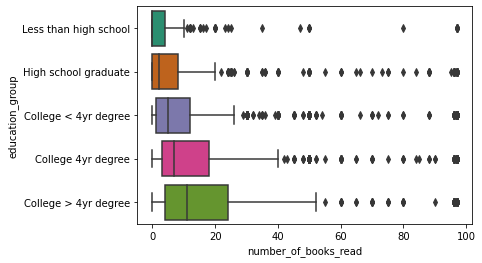

In [22]:
sns.boxplot(data=df, y='education_group', x='number_of_books_read',palette='Dark2',
             order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'])

In [23]:
df['education_group'].value_counts()

College < 4yr degree     1303
College 4yr degree       1264
High school graduate     1111
College > 4yr degree      915
Less than high school     348
Unknown                    65
Name: education_group, dtype: int64

In [24]:
# what if we took an equal sample?
# first remove unknowns
nounknown = df.loc[df['education_group'] != 'Unknown']

In [25]:
# then make sample
sample_size2 = 348
edusample = nounknown.groupby('education_group').apply(lambda x: x.sample(sample_size2))

In [26]:
edusample['education_group'].value_counts()

College 4yr degree       348
College < 4yr degree     348
College > 4yr degree     348
High school graduate     348
Less than high school    348
Name: education_group, dtype: int64

Text(0.5, 1.0, 'Total Books Read by Education Level')

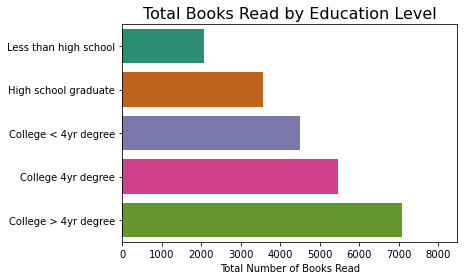

In [27]:
sns.barplot(data=edusample, y='education_group', x='number_of_books_read',palette='Dark2',errwidth=0,
           order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'],estimator=sum)
plt.ylabel('')
plt.xlabel('Total Number of Books Read')
plt.title('Total Books Read by Education Level',size=16)

<AxesSubplot:xlabel='number_of_books_read', ylabel='education_group'>

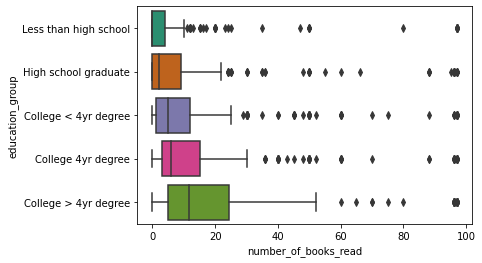

In [28]:
sns.boxplot(data=edusample, y='education_group', x='number_of_books_read',palette='Dark2',
             order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'])

In [29]:
# this still looks pretty consistant. The more education someone has, the more they tend to read
# though there are outliers

In [30]:
# do people who read e-books read more?

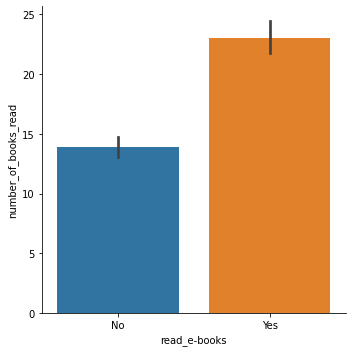

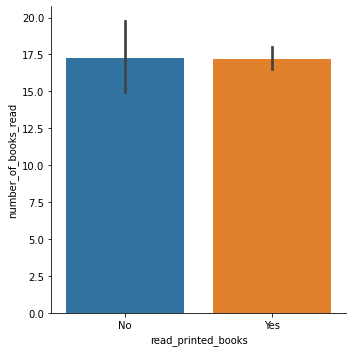

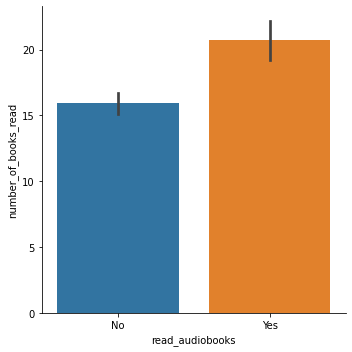

In [31]:
sns.catplot(data=dfreaders, x='read_e-books', y='number_of_books_read',kind='bar')
sns.catplot(data=dfreaders, x='read_printed_books', y='number_of_books_read',kind='bar')
sns.catplot(data=dfreaders, x='read_audiobooks', y='number_of_books_read',kind='bar')

Text(0, 0.5, '')

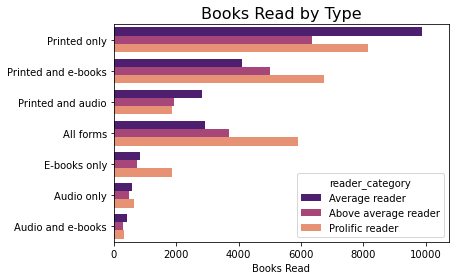

In [32]:
sns.barplot(data=df,x='number_of_books_read', y='reading_type',palette='magma', hue='reader_category',
            hue_order=['Average reader','Above average reader','Prolific reader'],
             order=['Printed only','Printed and e-books','Printed and audio','All forms','E-books only',
                    'Audio only','Audio and e-books'],errwidth=0,estimator=sum)
plt.title('Books Read by Type',size=16)
plt.xlabel('Books Read')
plt.ylabel('')

In [33]:
# prolific readers are more likely to read of various types than average and above average readers
# but all categories of readers prefer printed

<AxesSubplot:xlabel='number_of_books_read'>

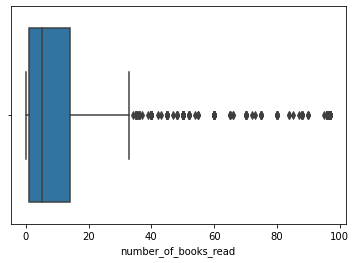

In [34]:
sns.boxplot(x=df['number_of_books_read'])

In [35]:
np.percentile(df['number_of_books_read'], [25,50,75,80,85,90,93,95])

array([ 1.,  5., 14., 20., 25., 40., 50., 70.])

In [36]:
# I've read 40 books this year, so I've already read more than 90% of Americans!

In [57]:
df['number_of_books_read'].groupby(df['state']).agg(['mean','median']).sort_values(by=['mean'])

,mean,median
state,,
DC,7.375000,3.5
WV,8.166667,2.5
MA,9.381443,4.0
NJ,9.736000,5.0
MS,10.281250,3.0
TN,10.432692,4.0
KS,10.791667,4.5
KY,10.797297,4.0
LA,10.970588,3.0


In [58]:
df.shape

(5006, 23)